In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

## Load the data

In [2]:
df =pd.read_excel(r'C:\Users\Sameriah\Python_myWork\project\California housing price\housing.xlsx')
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100


In [3]:
df.describe().round()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.0,20640.0,20640.0,20640.0,20433.0,20640.0,20640.0,20640.0,20640.0
mean,-120.0,36.0,29.0,2636.0,538.0,1425.0,500.0,4.0,206856.0
std,2.0,2.0,13.0,2182.0,421.0,1132.0,382.0,2.0,115396.0
min,-124.0,33.0,1.0,2.0,1.0,3.0,1.0,0.0,14999.0
25%,-122.0,34.0,18.0,1448.0,296.0,787.0,280.0,3.0,119600.0
50%,-118.0,34.0,29.0,2127.0,435.0,1166.0,409.0,4.0,179700.0
75%,-118.0,38.0,37.0,3148.0,647.0,1725.0,605.0,5.0,264725.0
max,-114.0,42.0,52.0,39320.0,6445.0,35682.0,6082.0,15.0,500001.0


In [4]:
#df.dtypes

## Handle missing values 

In [5]:
#df.isnull().sum()

In [6]:
for i in df.select_dtypes(include = ['int','float']):
    mean_value =df.mean(axis=0)
    df[i].fillna(value=mean_value[i],inplace= True) 
  

C:\Users\Sameriah\AppData\Local\Temp/ipykernel_15124/3114088943.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_value =df.mean(axis=0)


In [7]:
df.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,419.27,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,297.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,438.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,643.25,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [8]:
#df.isnull().sum()

In [9]:
#df.dtypes

## Encode categorical data 


In [10]:
ocean=pd.get_dummies(df['ocean_proximity'])
df= df.drop('ocean_proximity', axis =1)
#df.head(3)

In [11]:
df =pd.concat([df,ocean],axis=1)
df.head(3)
#df.isnull().sum()
#df.dtypes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0


## Split the dataset 

In [12]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

### x and y arrays

In [13]:
input_X = df.drop('median_house_value', axis =1)
output_Y = df[['median_house_value']]

### Train/Test Split 

In [14]:
x_train, x_test, y_train, y_test = train_test_split(input_X, output_Y, test_size = 0.2 , random_state = 101)

## Standardize data 

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


x_train = pd.DataFrame(x_train , columns = input_X.columns)
x_test = pd.DataFrame(x_test , columns = input_X.columns)


## Perform Linear Regression 

In [16]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [17]:
the_prediction =lm.predict(x_test)
the_prediction.max()

675623.4593290647

In [18]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, the_prediction)).round())

RMSE: 72440.0


In [19]:
from sklearn.metrics import r2_score
print(r2_score(y_test, the_prediction))
# the model almost good 

0.6118328485015198


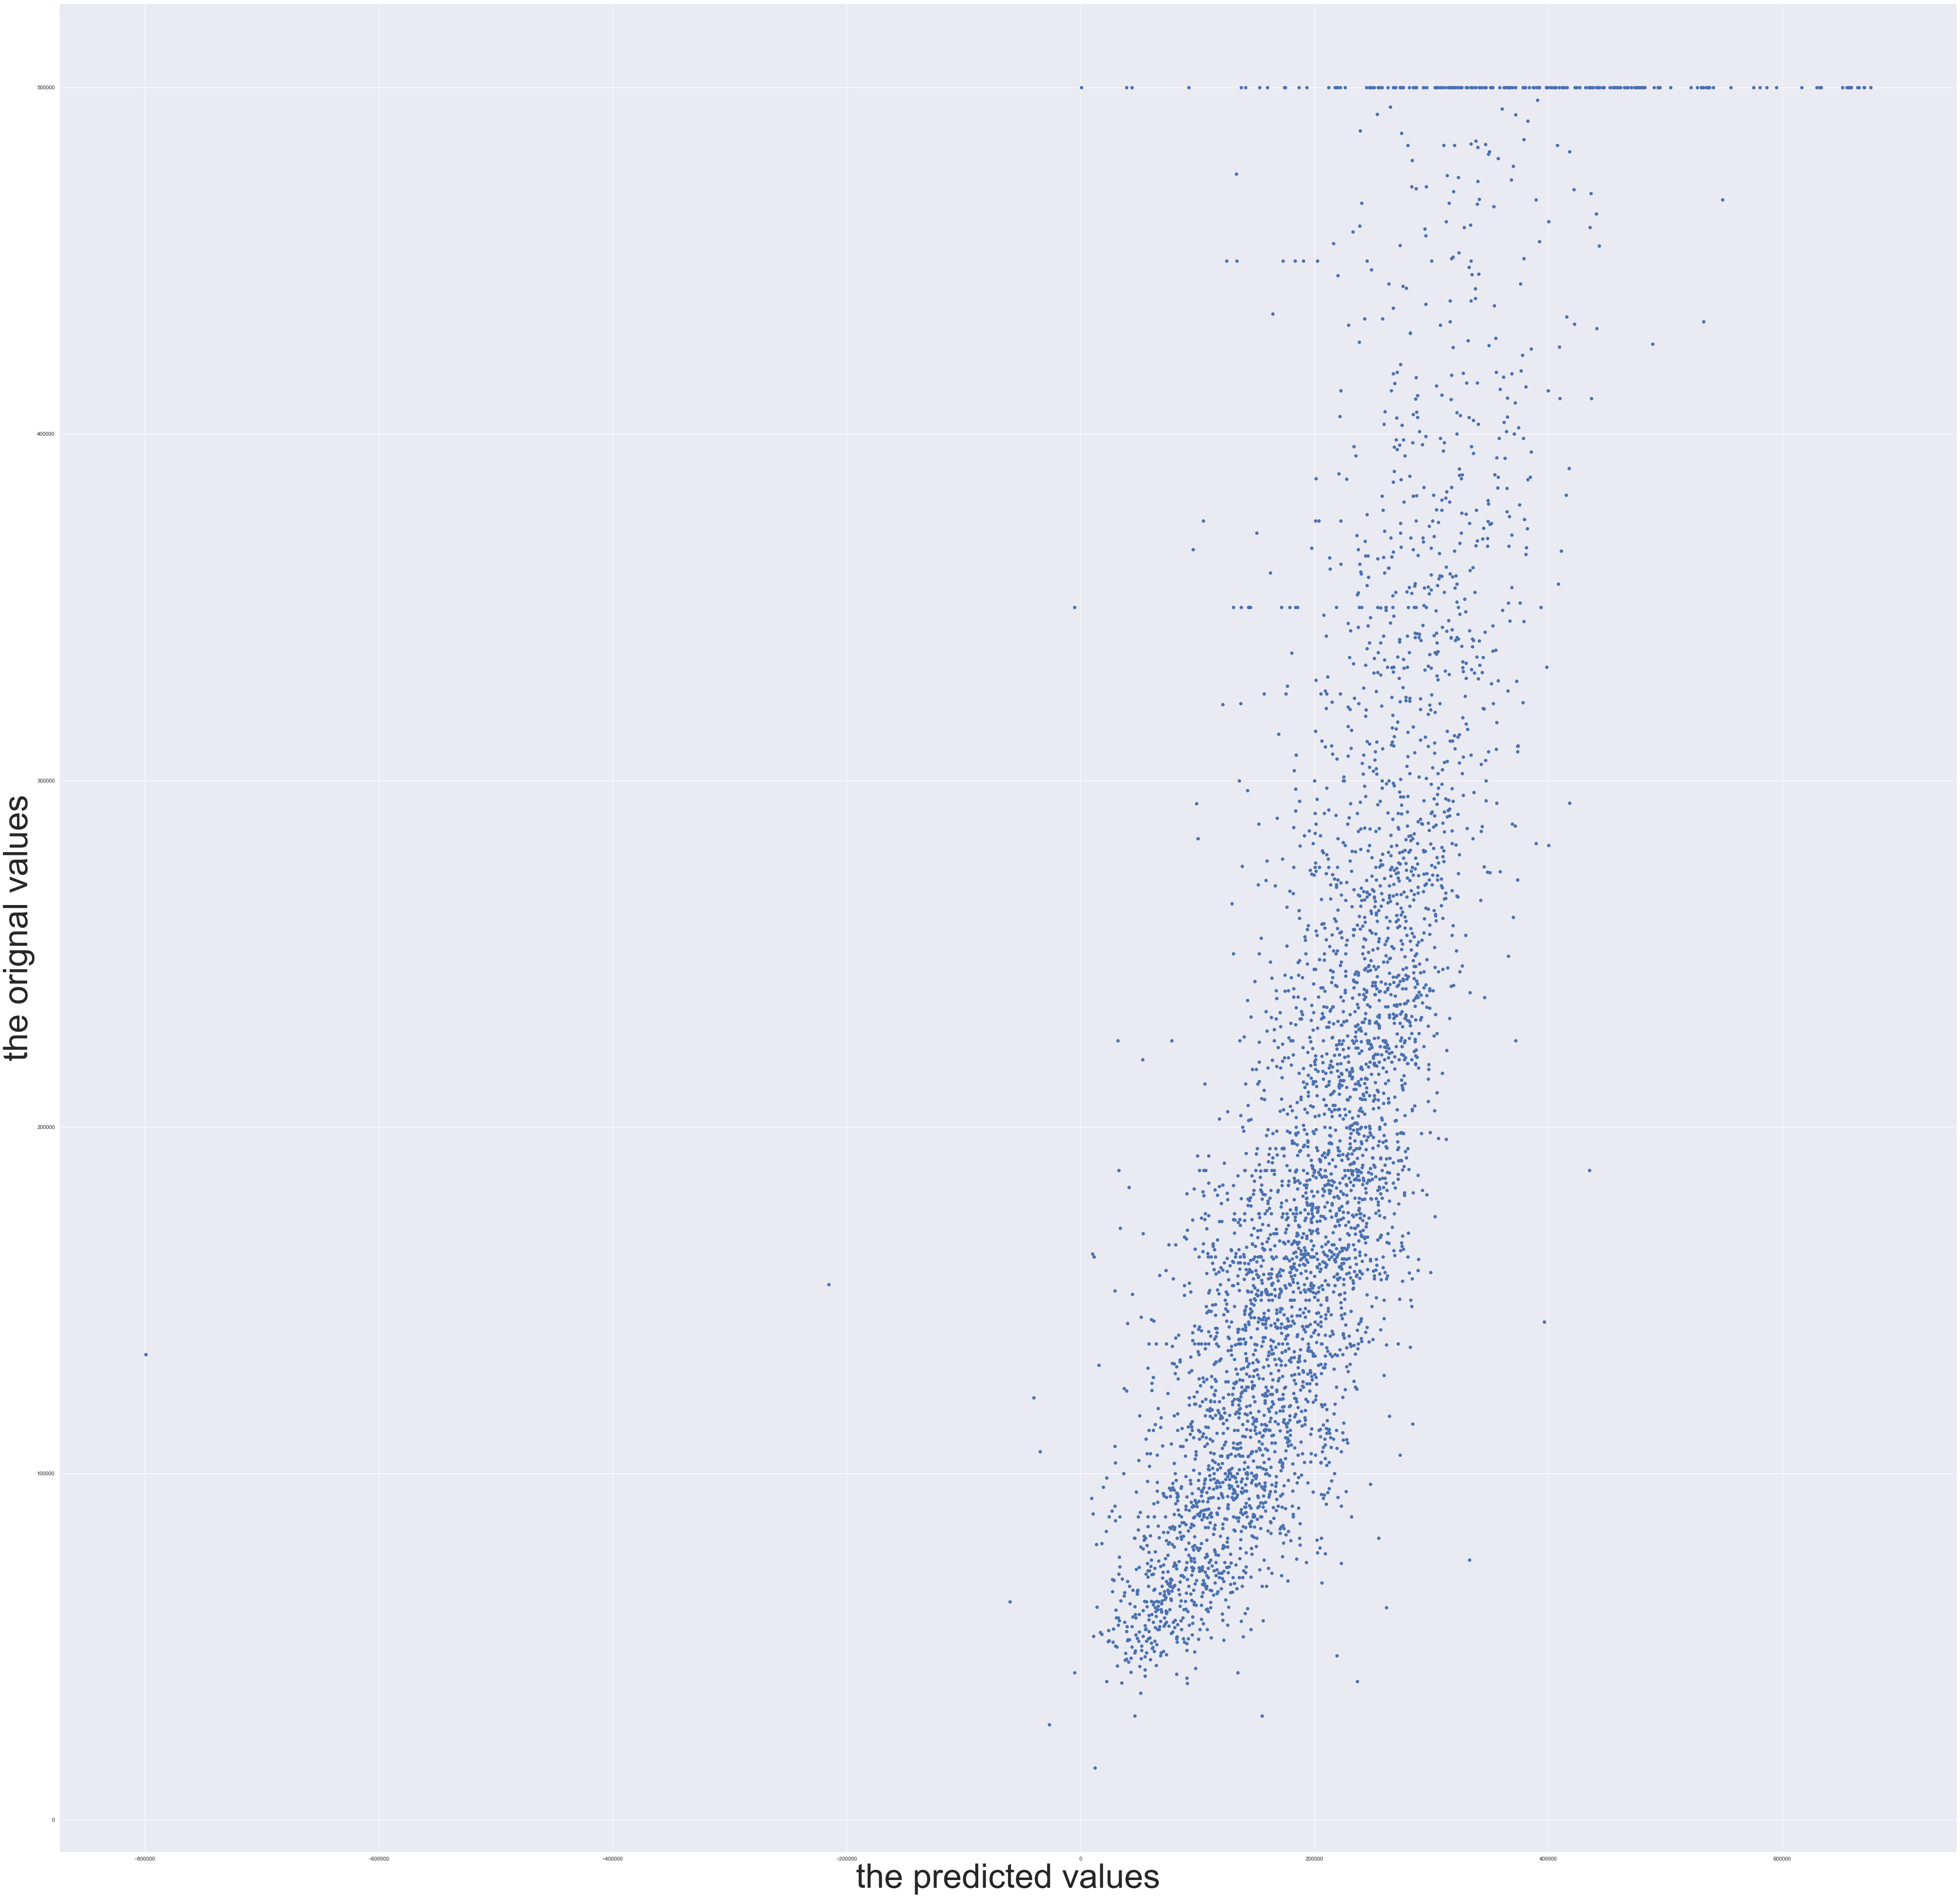

In [29]:
plt.figure(figsize=(70, 70))
plt.scatter(the_prediction, y_test)
plt.xlabel("the predicted values", size =70)
plt.ylabel("the orignal values",size =70)
#plt.savefig('all_input_facotrs.png')
plt.show()

## Bonus exercise: Perform Linear Regression with one independent variable 

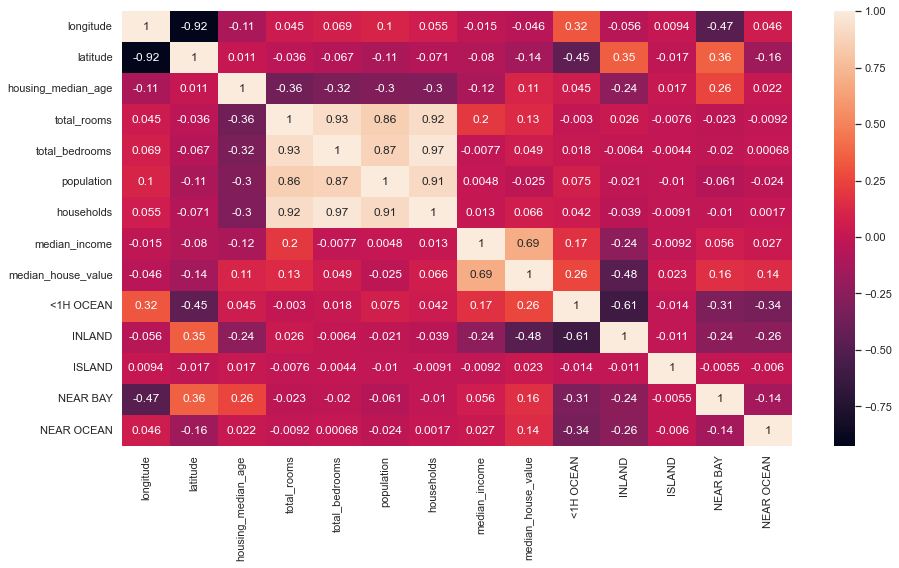

In [21]:
df.corr()
sns.set(rc={'figure.figsize':(15,8)})
svm =sns.heatmap(df.corr(), annot =True)
figure = svm.get_figure()    
#figure.savefig('heatmap.png', dpi=400)

In [22]:
### the strongest correlation with median_house_value ### 
# median_income => 0.69 => +ve relation 
# ocean_proximity_inLand =>-0.48 => negative relation 

In [23]:
bonus_X = df[['median_income']]
bonus_Y = df[['median_house_value']]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(bonus_X, bonus_Y, test_size = 0.2 , random_state = 101)

In [25]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


x_train = pd.DataFrame(x_train , columns = bonus_X.columns)
x_test = pd.DataFrame(x_test , columns = bonus_Y.columns)

In [26]:
lm = LinearRegression()
lm.fit(x_train,y_train)
bonus_prediction =lm.predict(x_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, bonus_prediction)).round())

RMSE: 84760.0


In [27]:
from sklearn.metrics import r2_score
print(r2_score(y_test, bonus_prediction))
# the model almost good 

0.46856858009844593


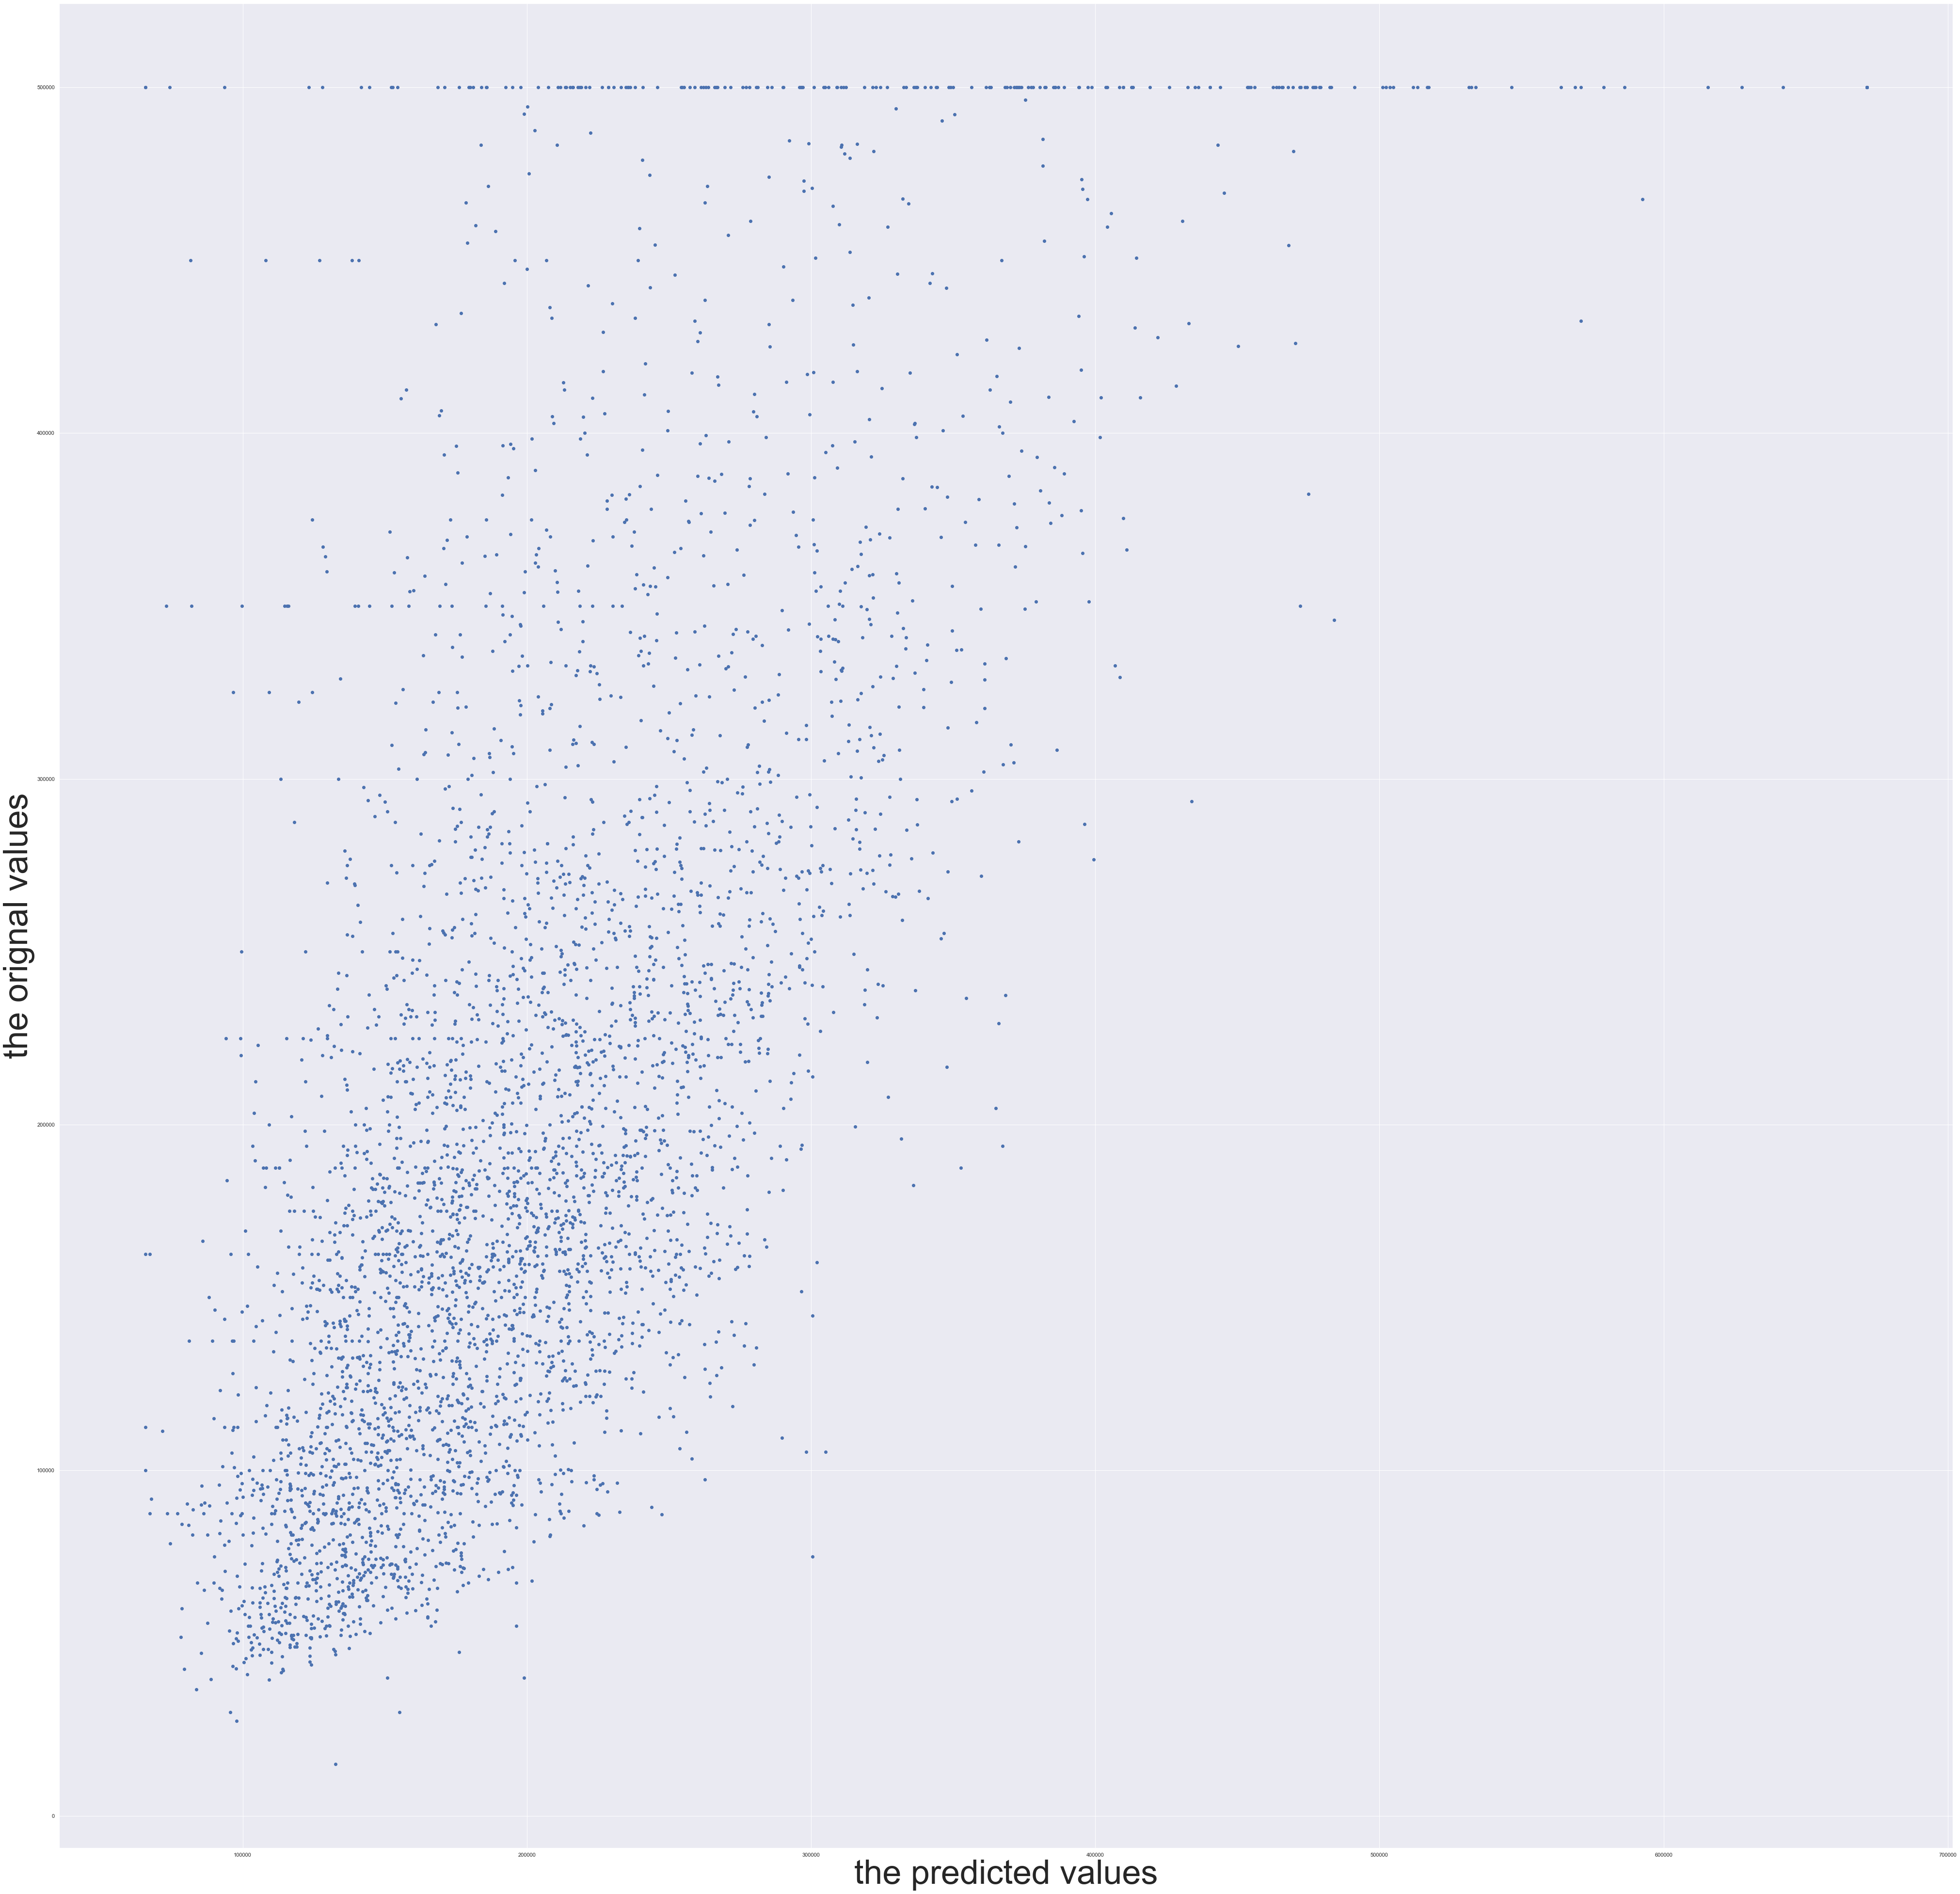

In [28]:
plt.figure(figsize=(70, 70))
plt.scatter(bonus_prediction, y_test)
plt.xlabel("the predicted values", size =70)
plt.ylabel("the orignal values",size =70)
#plt.savefig('median_income.png')
plt.show()